# Analyze solution
This notebooks provides scripts to analyze specific solution.

## Init
Change path to relevant problem and solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analyze_solution import *
   
problem, solution, solution_geo = (get_data(
    problem_path = '../experiments/demo/problems/balance.delivery.100.json',
    solution_path = '../experiments/demo/out/default_balance.delivery.100/solution_0.json')
)

### Problem statistics

In [2]:
extract_problem_statistics(problem)

,jobs,vehicle types,vehicle profiles,total vehicles,relations
0,100,1,1,5,0


### Jobs

In [3]:
jobs = extract_jobs_statistics(problem)

df = {}
for task_type in ['pickups', 'deliveries', 'replacements', 'services']:
    df[task_type] = [sum(jobs[task_type])]

pd.DataFrame.from_dict(df)

,pickups,deliveries,replacements,services
0,0,100,0,0


In [4]:
jobs.describe()

,deliveries,pickups,replacements,services,service time duration,time window duration
count,100.0,100.0,100.0,100.0,100.0,100.0
mean,1.0,0.0,0.0,0.0,300.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,300.0,0.0
25%,1.0,0.0,0.0,0.0,300.0,0.0
50%,1.0,0.0,0.0,0.0,300.0,0.0
75%,1.0,0.0,0.0,0.0,300.0,0.0
max,1.0,0.0,0.0,0.0,300.0,0.0


* `deliveries`, `pickups`, `replacements`, `services` columns show amount of such task types per single job
* `0` is used for `time window duration` when `time window` is not defined

### Vehicle types

In [5]:
extract_vehicle_statistics(problem)

,type,available,capacity,breaks,reloads,start location,start time,end location,end time
0,vehicle,5,[20],1,0,"52.4181,13.4637",2020-05-01T09:00:00.00Z,"52.4181,13.4637",2020-05-01T18:00:00.00Z


### Objective functions

In [6]:
objectives = extract_problem_objectives(problem)

objectives

,index,type,priority,options.tolerance,options.threshold
0,0,minimize-unassigned,primary,NaN,NaN
1,1,minimize-tours,primary,NaN,NaN
2,0,minimize-cost,secondary,NaN,NaN
3,1,balance-distance,secondary,0.01,0.05


## Solution statistics

In [7]:
extract_solution_statistics(solution)

,tours,unassigned,cost,distance,duration,driving,serving,waiting,break
0,5,0,681.946,452805,93277,45277,30000,0,18000


## Tour statistics

In [8]:
tours_statistics = extract_tours_statistic(solution)

tours_statistics

,vehicle,type,shift,stops,cost,distance,duration,driving,serving,waiting,break,max load,activities,deliveries,pickups,breaks,reloads,start,finish
0,vehicle_4,vehicle,0,22,132.3366,84783,18076,8476,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:01:16Z
1,vehicle_3,vehicle,0,22,133.8564,86932,18294,8694,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:04:54Z
2,vehicle_1,vehicle,0,22,139.4526,94938,19093,9493,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:18:13Z
3,vehicle_5,vehicle,0,22,137.6830,92415,18840,9240,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:14:00Z
4,vehicle_2,vehicle,0,22,138.6174,93737,18974,9374,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:16:14Z


* `max load` assumes one dimensional capacity

In [9]:
tours_statistics.describe(percentiles=[.1, .25, .5, .75, .9])

,shift,stops,cost,distance,duration,driving,serving,waiting,break,activities,deliveries,pickups,breaks,reloads
count,5.0,5.0,5.000000,5.00000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,22.0,136.389200,90561.00000,18655.400000,9055.400000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
std,0.0,0.0,3.116964,4450.76808,445.362549,445.362549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,22.0,132.336600,84783.00000,18076.000000,8476.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
10%,0.0,22.0,132.944520,85642.60000,18163.200000,8563.200000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
25%,0.0,22.0,133.856400,86932.00000,18294.000000,8694.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
50%,0.0,22.0,137.683000,92415.00000,18840.000000,9240.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
75%,0.0,22.0,138.617400,93737.00000,18974.000000,9374.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
90%,0.0,22.0,139.118520,94457.60000,19045.400000,9445.400000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
max,0.0,22.0,139.452600,94938.00000,19093.000000,9493.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0


## Algorithm performance

To collect algorithm performance data, you need to run the solver with metrics enabled.

### overall statistic

In [10]:
(pd.json_normalize(solution['extras']['metrics']).drop('evolution', axis=1)
 .rename(columns={'duration': 'duration (sec)', 'speed': 'speed (gen/sec)'}))

,duration (sec),generations,speed (gen/sec)
0,9,3001,302.543799


### cost change over time/generation

* change `timestamp` to `number` in order to have generation number instead of timestamp.

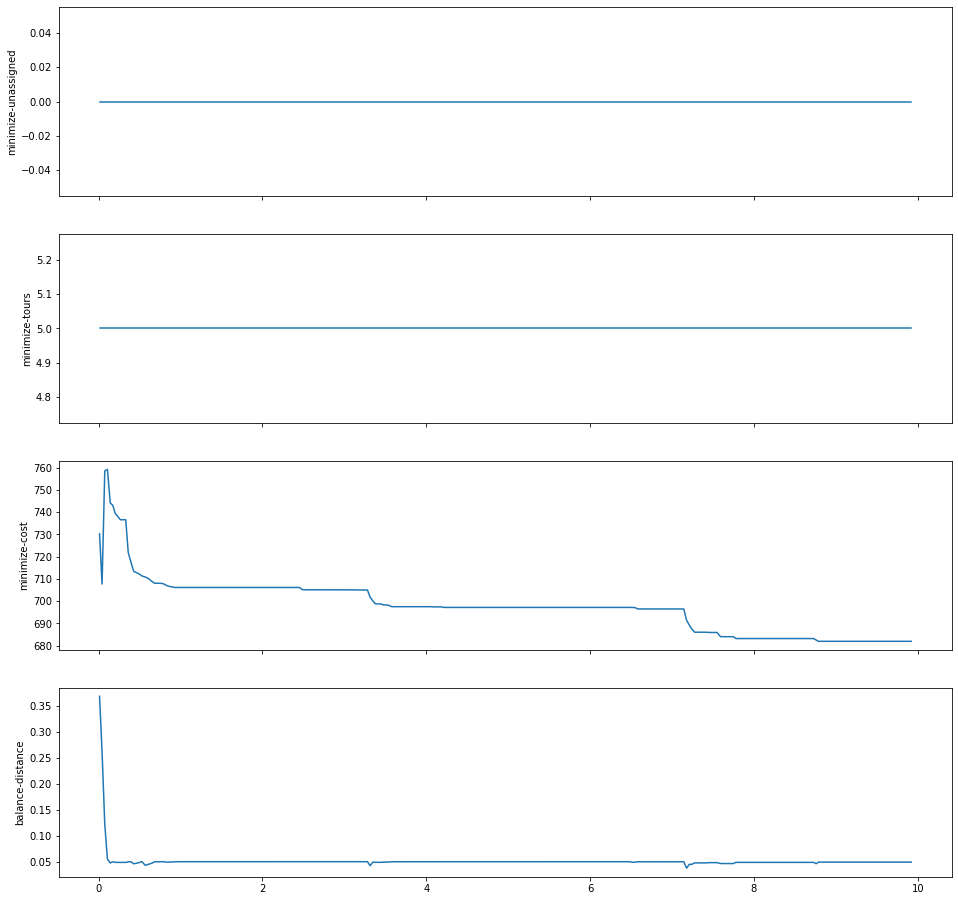

In [11]:
x_column = 'timestamp'

df = extract_evolution_metrics(objectives, solution)

plot_len = len(objectives)
fig, axs = plt.subplots(plot_len, figsize=(16, plot_len * 4) , sharex=True)

for idx, objective_type in enumerate(objectives.type):
    axs[idx].plot(df[x_column], df[objective_type])
    axs[idx].set(ylabel = objective_type)

## Geojson Visualization

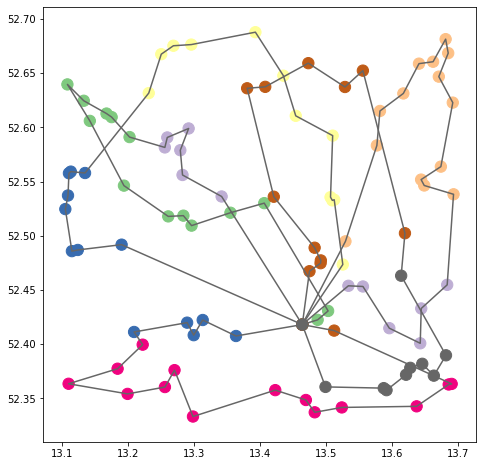

In [12]:
if not solution_geo.empty:
    plot = solution_geo.plot(cmap='Accent', markersize=128, figsize=(16,8))